# Project Title - AI-Driven Road Accident Detection and Severity Prediction with Geo-Temporal Intelligence


# 1. Identifying the Problem

Road accidents are a significant cause of injury and death globally. In many cases, emergency responders reach accident sites without knowing the severity of the incident, which delays timely medical intervention. Currently, there is no automated system to estimate accident severity using historical data. This project aims to develop a machine learning model to predict the severity level of road accidents using structured data such as time, weather, road type, and location. The goal is to support faster emergency response and proactive planning through severity prediction and geo-temporal analysis.

# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv(r'D:\Horizon\Semester 6\Nature Inspired Algorithm\Accident Detection and Severity Prediction\cleaned_accident_data_SL.csv')

In [3]:
# Overview of data
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (10000, 42)


,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),...,Nautical_Twilight,Astronomical_Twilight,Temp_Binned,Hour,Weekday,Is_Weekend,Rush_Hour_SL,Time_Category_SL,Road_Type_SL,Weather_Category_SL
0,3,2016-02-08 05:46:00,39.865147,-84.058723,NaN,NaN,0.01,2016-02-08 05:58:00,0.323213,36.4,...,Night,Night,Very Cold,5,0,0,0,Night,Urban,Rain
1,2,2016-02-08 06:07:59,39.928059,-82.831184,NaN,NaN,0.01,2016-02-08 05:51:00,0.333007,36.4,...,Night,Day,Very Cold,6,0,0,1,Night,Urban,Rain
2,2,2016-02-08 06:49:27,39.063148,-84.032608,NaN,NaN,0.01,2016-02-08 06:56:00,0.314398,33.3,...,Day,Day,Very Cold,6,0,0,1,Night,Urban,Other
3,3,2016-02-08 07:23:34,39.747753,-84.205582,NaN,NaN,0.01,2016-02-08 07:38:00,0.305583,31.0,...,Day,Day,Very Cold,7,0,0,1,Morning,Urban,Cloudy
4,2,2016-02-08 07:39:07,39.627781,-84.188354,NaN,NaN,0.01,2016-02-08 07:53:00,0.314398,33.3,...,Day,Day,Very Cold,7,0,0,1,Morning,Urban,Cloudy


In [4]:
# Column names
print("\nColumns:", df.columns.tolist())


Columns: ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Temp_Binned', 'Hour', 'Weekday', 'Is_Weekend', 'Rush_Hour_SL', 'Time_Category_SL', 'Road_Type_SL', 'Weather_Category_SL']


In [8]:
# Data types and non-null counts
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               10000 non-null  int64  
 1   Start_Time             10000 non-null  object 
 2   Start_Lat              10000 non-null  float64
 3   Start_Lng              10000 non-null  float64
 4   End_Lat                0 non-null      float64
 5   End_Lng                0 non-null      float64
 6   Distance(mi)           10000 non-null  float64
 7   Weather_Timestamp      10000 non-null  object 
 8   Temperature(F)         10000 non-null  float64
 9   Wind_Chill(F)          10000 non-null  float64
 10  Humidity(%)            10000 non-null  float64
 11  Pressure(in)           10000 non-null  float64
 12  Visibility(mi)         10000 non-null  float64
 13  Wind_Direction         10000 non-null  object 
 14  Wind_Speed(mph)        10000 non-null  float64
 

In [5]:
# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Severity     Start_Lat     Start_Lng  End_Lat  End_Lng  \
count  10000.00000  10000.000000  10000.000000      0.0      0.0   
mean       2.39470     38.128680   -119.041084      NaN      NaN   
std        0.49126      0.749559      9.963780      NaN      NaN   
min        1.00000     36.352592   -123.810753      NaN      NaN   
25%        2.00000     37.643864   -122.159031      NaN      NaN   
50%        2.00000     37.959778   -121.875954      NaN      NaN   
75%        3.00000     38.574538   -121.349976      NaN      NaN   
max        4.00000     41.428753    -81.550728      NaN      NaN   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  10000.000000    10000.000000   10000.000000  10000.000000   
mean       0.021386        0.545752      35.933150      0.609992   
std        0.397797        0.169412       4.052462      0.264405   
min        0.000000        0.000000      -8.400000      0.000000   
25%        0.000000   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Missing Values:
End_Lat              10000
End_Lng              10000
Start_Time               0
Severity                 0
Start_Lng                0
Start_Lat                0
Distance(mi)             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
dtype: int64


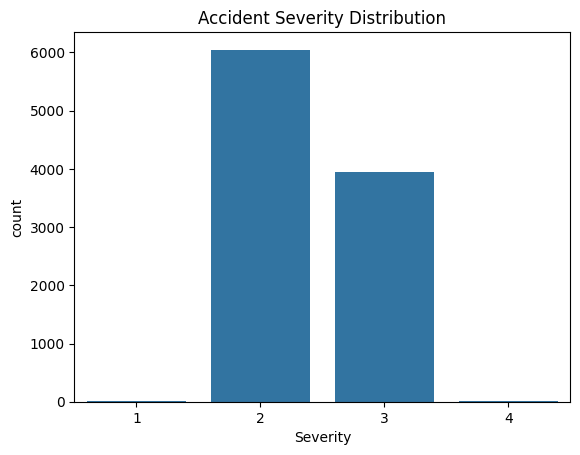

In [7]:
# Visualize data: Severity distribution
sns.countplot(data=df, x='Severity')
plt.title("Accident Severity Distribution")
plt.show()

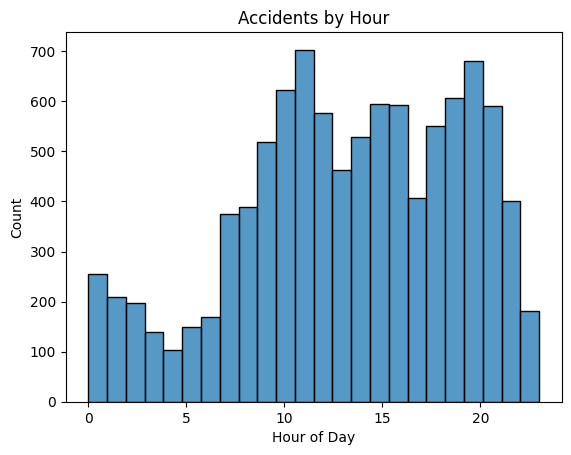

In [8]:
# Visualize data: Accidents by hour
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title("Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

# 3. Data Preprocessing

**CLEANING**

In [10]:
# Check how much data is missing
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


End_Lat    100.0
End_Lng    100.0
dtype: float64


In [12]:
# Drop End_Lat and End_Lng since they are mostly missing and not needed
df = df.drop(["End_Lat", "End_Lng"], axis=1)


In [13]:
# Drop all US-specific columns and unused metadata
drop_us_cols = [
    'City', 'County', 'Timezone', 'State', 'Zipcode', 'Country',
    'Street', 'Number', 'End_Time', 'Airport_Code', 'Description',
    'ID', 'Source'
]

# Drop only if they exist in the DataFrame
df.drop(columns=[col for col in drop_us_cols if col in df.columns], inplace=True)

In [14]:
# Remove incorrect/incomplete data
# Drop rows with missing Start_Time or Severity (very important columns)
df.dropna(subset=['Start_Time', 'Severity'], inplace=True)


In [15]:
# Numeric: fill with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
#Apply binning (mean/median smoothing)
df['Temp_Binned'] = pd.cut(df['Temperature(F)'],
                           bins=[-10, 50, 70, 90, 120],
                           labels=['Very Cold', 'Cold', 'Warm', 'Hot'])



**REDUCTION**

In [18]:
#Attribute subset selection.
#Remove columns irrelevant to Sri Lankan context
drop_cols = ['ID', 'Source', 'Description', 'End_Time', 'Street',
             'Zipcode', 'Airport_Code', 'Country', 'State', 'Number']

df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


**TRANSFORMATION**

In [19]:
# a.Normalize Data
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Pressure(in)', 'Wind_Speed(mph)']
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [21]:
# b.Feature Engineering (Sri Lanka–specific)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Rush hour in Sri Lanka: 6–9 AM and 4–7 PM
df['Rush_Hour_SL'] = df['Hour'].apply(lambda x: 1 if (6 <= x <= 9 or 16 <= x <= 19) else 0)


In [22]:
# c.Discretization
df['Time_Category_SL'] = pd.cut(df['Hour'],
                                 bins=[-1, 6, 12, 18, 24],
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'])




In [23]:
# d.Concept Hierarchy Generation (Sri Lanka Context)
# Road Type hierarchy (simulate with visibility)
df['Road_Type_SL'] = df['Visibility(mi)'].apply(lambda x: 'Highway' if x > 1.5 else 'Urban')

# Simplified weather categories
def simplify_weather_sl(condition):
    if 'Rain' in condition: return 'Rain'
    elif 'Clear' in condition: return 'Clear'
    elif 'Fog' in condition or 'Mist' in condition: return 'Fog'
    elif 'Cloud' in condition: return 'Cloudy'
    else: return 'Other'

df['Weather_Category_SL'] = df['Weather_Condition'].apply(simplify_weather_sl)


In [24]:
# Preview the final shape and columns
print("Final cleaned shape:", df.shape)
print("Final columns:", df.columns.tolist())
df.head()

Final cleaned shape: (10000, 40)
Final columns: ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Temp_Binned', 'Hour', 'Weekday', 'Is_Weekend', 'Rush_Hour_SL', 'Time_Category_SL', 'Road_Type_SL', 'Weather_Category_SL']


,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Nautical_Twilight,Astronomical_Twilight,Temp_Binned,Hour,Weekday,Is_Weekend,Rush_Hour_SL,Time_Category_SL,Road_Type_SL,Weather_Category_SL
0,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,2016-02-08 05:58:00,0.323213,36.4,0.902174,0.965954,...,Night,Night,Very Cold,5,0,0,0,Night,Urban,Rain
1,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,2016-02-08 05:51:00,0.333007,36.4,1.000000,0.964868,...,Night,Day,Very Cold,6,0,0,1,Night,Urban,Rain
2,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,2016-02-08 06:56:00,0.314398,33.3,1.000000,0.965592,...,Day,Day,Very Cold,6,0,0,1,Night,Urban,Other
3,3,2016-02-08 07:23:34,39.747753,-84.205582,0.01,2016-02-08 07:38:00,0.305583,31.0,0.956522,0.964506,...,Day,Day,Very Cold,7,0,0,1,Morning,Urban,Cloudy
4,2,2016-02-08 07:39:07,39.627781,-84.188354,0.01,2016-02-08 07:53:00,0.314398,33.3,0.880435,0.964868,...,Day,Day,Very Cold,7,0,0,1,Morning,Urban,Cloudy


In [25]:
# Save your cleaned dataset to CSV
df.to_csv('cleaned_accident_data_SL.csv', index=False)

print("Dataset saved as 'cleaned_accident_data_SL.csv'")


Dataset saved as 'cleaned_accident_data_SL.csv'


# 4. Data Mining & Machine Learning

Libraries and uses:

Data handling - pandas, numpy

Model building - scikit-learn

Evaluation - metrics from scikit-learn

Visualization - matplotlib

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned Sri Lanka dataset
df = pd.read_csv('cleaned_accident_data_SL.csv')

Goal in this part is predict Severity in levels 1-3 from geo-temporal, weather, and road features.

**Handle Categorical Variables**

In [26]:
# Handle categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove datetime columns from encoding (kept as reference, not model input)
if 'Start_Time' in cat_cols:
    cat_cols.remove('Start_Time')
if 'Weather_Timestamp' in cat_cols:
    cat_cols.remove('Weather_Timestamp')

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

**Define Features & Target**

In [27]:
X = df.drop("Severity", axis=1)  # Features
y = df["Severity"]               # Target

**Train-Test Split**

In [28]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

test_size=0.2 - 80% train, 20% test.

stratify=y - Keeps severity class proportions the same in train and test.

**Feature Scaling**

In [29]:
# Select only numeric columns for models
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fill NaNs in numeric columns with median
X_train_num = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test_num  = X_test[numeric_cols].fillna(X_train[numeric_cols].median())

**Train Multiple Models**

In this, we'll train 3 models for comparison:



1. Decision Tree (simple & interpretable)
2. Random Forest (robust & powerful)
3. Gradient Boosting (simple)



In [30]:
# Ensure *all* columns have no NaNs after encoding
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# For numeric subset (used for Gradient Boosting & all models)
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [31]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


# Train & Evaluate
results = []
for name, model in models.items():
    model.fit(X_train_num, y_train)
    y_pred = model.predict(X_test_num)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    print(f"\n {name}")
    print(classification_report(y_test, y_pred))




 Decision Tree
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.89      0.88      0.89      1210
           3       0.82      0.83      0.83       788
           4       0.00      0.00      0.00         1

    accuracy                           0.86      2000
   macro avg       0.43      0.43      0.43      2000
weighted avg       0.86      0.86      0.86      2000



d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



 Random Forest
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.82      0.84      0.83      1210
           3       0.75      0.71      0.73       788
           4       0.00      0.00      0.00         1

    accuracy                           0.79      2000
   macro avg       0.39      0.39      0.39      2000
weighted avg       0.79      0.79      0.79      2000



d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



 Gradient Boosting
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.87      0.86      0.87      1210
           3       0.79      0.80      0.79       788
           4       0.00      0.00      0.00         1

    accuracy                           0.84      2000
   macro avg       0.41      0.42      0.41      2000
weighted avg       0.84      0.84      0.84      2000



d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**Try different parameter settings**

In [32]:
# Tuned Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the tuned Random Forest
rf_model.fit(X_train_num, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test_num)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Tuned Random Forest Accuracy: {acc_rf:.4f}")


Tuned Random Forest Accuracy: 0.7980


**Compare Models**




In [33]:
#Compare model accuracies

results_df = pd.DataFrame(results)
print("\n Model Comparison:")
print(results_df)


 Model Comparison:
               Model  Accuracy
0      Decision Tree    0.8625
1      Random Forest    0.7905
2  Gradient Boosting    0.8365


In [34]:
# Select best model
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
print(f"\n Best Model: {best_model_name}")


 Best Model: Decision Tree


# 5. Evaluation & Interpretation

**Results: Present findings clearly**


Best Model Selected: Decision Tree
Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.89      0.88      0.89      1210
           3       0.82      0.83      0.83       788
           4       0.00      0.00      0.00         1

    accuracy                           0.86      2000
   macro avg       0.43      0.43      0.43      2000
weighted avg       0.86      0.86      0.86      2000



d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


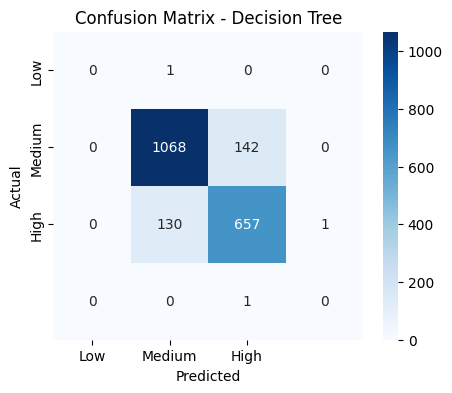

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define and train the models
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

tree_model.fit(X_train_num, y_train)
rf_model.fit(X_train_num, y_train)
gb_model.fit(X_train_num, y_train)

trained_models = {
    "Decision Tree": tree_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = trained_models[best_model_name]

print(f"\nBest Model Selected: {best_model_name}")

# Predictions
y_pred = best_model.predict(X_test_num)

# Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

**Cross-Validation (Reliability Check)**

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_num, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.850625 0.8625   0.846875 0.863125 0.84875 ]
Mean CV Accuracy: 0.8544


**Check for Overfitting vs Underfitting**

In [38]:
train_acc = accuracy_score(y_train, best_model.predict(X_train_num))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

if train_acc - test_acc > 0.1:
    print("Possible Overfitting")
elif test_acc > train_acc:
    print("Possible Underfitting (rare but can happen)")
else:
    print("Model is well-generalized")


Training Accuracy: 0.9999
Testing Accuracy: 0.8625
Possible Overfitting


**Feature Importance (only for tree-based models)**

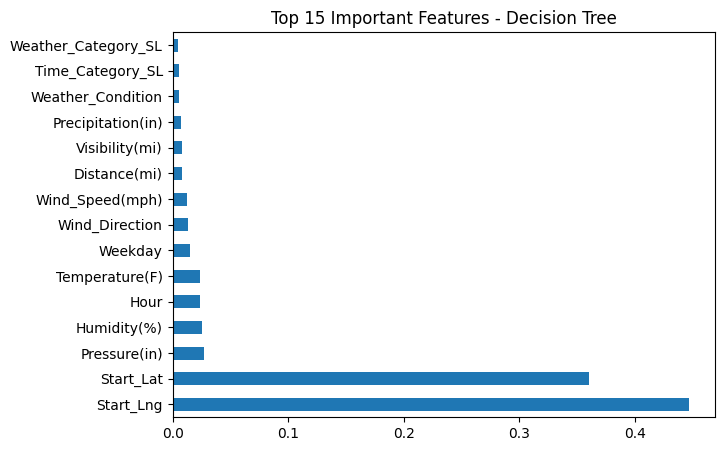

In [39]:
if best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
    importances = best_model.feature_importances_
    feat_imp = pd.Series(importances, index=X_train_num.columns).sort_values(ascending=False).head(15)

    plt.figure(figsize=(7,5))
    feat_imp.plot(kind='barh')
    plt.title(f"Top 15 Important Features - {best_model_name}")
    plt.show()

**Save Best Model**

In [40]:
import joblib

# Save the best model
joblib.dump(best_model, "final_accident_severity_model.pkl")
print("Final model saved as final_accident_severity_model.pkl")

Final model saved as final_accident_severity_model.pkl


final_accident_severity_model.pkl → your trained model

train_columns.pkl → the list of feature names used

In [42]:
import pickle

# Save your final model (you already did this as final_accident_severity_model.pkl)
with open("final_accident_severity_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the feature columns used for training
train_columns = list(X_train_num.columns)   # or X_train.columns if you didn’t filter
with open("train_columns.pkl", "wb") as f:
    pickle.dump(train_columns, f)

print("Final model and train_columns.pkl saved successfully!")

Final model and train_columns.pkl saved successfully!
